In [1]:
pwd

'G:\\My Drive\\Nicholas_Curci\\sprint 4'

In [2]:
%matplotlib qt5

In [3]:
from pylab import *

In [4]:
def onkey(event):
    global locations
    from pylab import close
    import os
    import json
    global fig
    
    if event.key=='escape':
        print("locations=",array(locations).__repr__())
        with open('locations.json', 'w') as outfile:
            json.dump(locations, outfile)
    
        close(fig)
        
def onclick(event):
    from pylab import plot,show,close
    global ix, iy
    global locations,fig,ax
    
    ix, iy = event.xdata, event.ydata
    global coords
    coords = [int(ix), int(iy)]
    print(coords)
    
    locations.append(coords)
    
    ax.plot(ix,iy,'go')
    fig.canvas.draw()
    show()
    return coords

def get_square_locations(filefilter):
    from pylab import imread,imsave,imshow,figure,show
    from glob import glob
    global locations,fig,ax
    locations=[]
    stop=False
    
    fnames=glob(filefilter)
    
    fig=figure()
    ax=subplot(1,1,1)
    arr=imread(fnames[0])
    imshow(arr)
    
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    cid2 = fig.canvas.mpl_connect('key_press_event', onkey)
    show()

In [5]:
get_square_locations('misc/pictures/*.jpg')

[27, 31]
[95, 31]
[168, 28]
[241, 24]
[319, 24]
[24, 86]
[95, 84]
[169, 81]
[244, 81]
[319, 76]
[23, 140]
[102, 136]
[176, 136]
[248, 137]
[321, 138]
[22, 197]
[107, 193]
[180, 196]
[243, 194]
[314, 196]
[30, 254]
[106, 251]
[181, 247]
[247, 248]
[315, 251]
locations= array([[ 27,  31],
       [ 95,  31],
       [168,  28],
       [241,  24],
       [319,  24],
       [ 24,  86],
       [ 95,  84],
       [169,  81],
       [244,  81],
       [319,  76],
       [ 23, 140],
       [102, 136],
       [176, 136],
       [248, 137],
       [321, 138],
       [ 22, 197],
       [107, 193],
       [180, 196],
       [243, 194],
       [314, 196],
       [ 30, 254],
       [106, 251],
       [181, 247],
       [247, 248],
       [315, 251]])


In [6]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\student\Anaconda2019\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft', 'linalg', 'info', 'power', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
def make_training_squares(filefilter,shape,locations=None):
    from glob import glob
    import os
    import json
    
    if locations is None:
        with open('locations.json') as json_file:
            locations = json.load(json_file)        
    
    fnames=glob(filefilter)
    arr=array(imread(fnames[0]))
    for location in locations:
        c,r=location
        c1=int(c-shape[1]/2)
        c2=int(c+shape[1]/2)
        r1=int(r-shape[0]/2)
        r2=int(r+shape[0]/2)

        c2=c2+(shape[1]-(c2-c1))
        r2=r2+(shape[0]-(r2-r1))

        arr[r1:r2,c1:c2,:]=arr[r1:r2,c1:c2,:]+100
        

    clf()
    imshow(arr)
    base,name=os.path.split(fnames[0])
    newdirname=base+"/squares"
    if not os.path.exists(newdirname):
        os.mkdir(newdirname)
    
    for fname in fnames:
        arr=array(imread(fname))
        base,name=os.path.split(fname)
        base,ext=os.path.splitext(name)
        for i,location in enumerate(locations):
            c,r=location
            c1=int(c-shape[1]/2)
            c2=int(c+shape[1]/2)
            r1=int(r-shape[0]/2)
            r2=int(r+shape[0]/2)

            c2=c2+(shape[1]-(c2-c1))
            r2=r2+(shape[0]-(r2-r1))

            square=arr[r1:r2,c1:c2,:]
            
            newfname=base+"_%d" %(i) + ext
            print(newdirname+"/"+newfname)
            imsave(newdirname+"/"+newfname,square)
                            

misc/pictures/squares/board1_0.jpg
misc/pictures/squares/board1_1.jpg
misc/pictures/squares/board1_2.jpg
misc/pictures/squares/board1_3.jpg
misc/pictures/squares/board1_4.jpg
misc/pictures/squares/board1_5.jpg
misc/pictures/squares/board1_6.jpg
misc/pictures/squares/board1_7.jpg
misc/pictures/squares/board1_8.jpg
misc/pictures/squares/board1_9.jpg
misc/pictures/squares/board1_10.jpg
misc/pictures/squares/board1_11.jpg
misc/pictures/squares/board1_12.jpg
misc/pictures/squares/board1_13.jpg
misc/pictures/squares/board1_14.jpg
misc/pictures/squares/board1_15.jpg
misc/pictures/squares/board1_16.jpg
misc/pictures/squares/board1_17.jpg
misc/pictures/squares/board1_18.jpg
misc/pictures/squares/board1_19.jpg
misc/pictures/squares/board1_20.jpg
misc/pictures/squares/board1_21.jpg
misc/pictures/squares/board1_22.jpg
misc/pictures/squares/board1_23.jpg
misc/pictures/squares/board1_24.jpg
misc/pictures/squares/board2_0.jpg
misc/pictures/squares/board2_1.jpg
misc/pictures/squares/board2_2.jpg
misc/

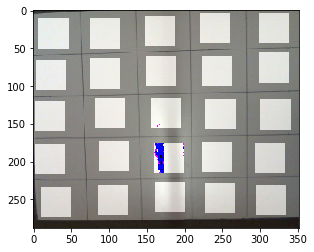

In [8]:
make_training_squares('misc/pictures/*.jpg',(40,40))

In [24]:

# use this in a notebook, not on the robot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\student\Anaconda2019\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw', 'split', 'argmax', 'copy', 'shape', 'prod', 'text', 'randint', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
# use this on the robot
# from pylab import *

In [26]:

from Game import *
from classy import *

In [27]:
def copyfile(src,dst):
    import platform,os
    s=platform.system()
    if s=="Windows":
        copy_command="copy /y"
        src=src.replace('/','\\')
        dst=dst.replace('/','\\')
    else:
        copy_command="cp -f"
        
    cmd=copy_command+" "+src+" "+dst
    print(cmd)
    os.system(cmd)

In [28]:
# get rid of this for the robot, because it has it's own take_picture function
def take_picture(filename='picture.jpg',view=True):
    copyfile('misc/pictures/board17.jpg',filename)
    print("Took picture ",filename)
    
# def take_picture(filename='picture.jpg',view=True):  # takes the newest one in the list
#     # replace this function with one that actually takes a picture
#     from glob import glob
#     import os
#     fnames=glob('misc/pictures/*.jpg')
#     newest = max(fnames, key=os.path.getctime)

#     copyfile(newest,filename)
#     print("Took picture ",filename)

In [29]:

def get_square(arr,index,shape,locations=None):
    import json
    
    if locations is None:
        with open('locations.json') as json_file:
            locations = json.load(json_file)        
    
    location=locations[index]
    c,r=location
    c1=int(c-shape[1]/2)
    c2=int(c+shape[1]/2)
    r1=int(r-shape[0]/2)
    r2=int(r+shape[0]/2)

    c2=c2+(shape[1]-(c2-c1))
    r2=r2+(shape[0]-(r2-r1))

    square=arr[r1:r2,c1:c2,:]
    
    return square

In [35]:

images=image.load_images('misc/pictures/squares')
shape=images.data[0].shape[:2]
data_train=data=image.images_to_vectors(images)  # train on all of them

classifier=kNearestNeighbor()
timeit(reset=True)
classifier.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

[white]: 393 files found
[black]: 51 files found
[red]: 56 files found
500 vectors of length 4800
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p4795', 'p4796', 'p4797', 'p4798', 'p4799'  (4800 features)
Target values given.
Target names: 'white', 'black', 'red'
Mean:  [139.284 139.088 133.154 ... 130.784 129.684 123.796]
Median:  [139. 140. 134. ... 135. 134. 128.]
Stddev:  [ 9.75045353 10.84823746 10.29399262 ... 16.98956574 17.57407591
 16.75799463]
Time Reset
Training time:  0.1602039337158203 seconds 


In [36]:

data_train.shape

(40, 40, 3)

In [37]:
def read_state_from_file(filename='current_board.txt'):
    with open(filename) as fid:
        text=fid.read()

    text2=text.strip().split('\n')
    number_of_rows=len(text2)
    number_of_cols=len(text2[0].split())
    
    b=Board(number_of_rows,number_of_cols)
        
    board=[int(v) for v in text.split()]
    b.board=board
    return b
    
def read_state():
    
    take_picture('current_board.jpg')
    arr=imread('current_board.jpg')
    
    # get predictions
    shape=data_train.shape[:2]
    squares=[get_square(arr,i,shape) for i in range(25)]
    test_images=image.array_to_image_struct(squares)
    test_data=image.images_to_vectors(test_images)
    predictions=classifier.predict(test_data.vectors)
    
    state=Board(5,5)
    for i in range(25):
        color=data_train.target_names[predictions[i]]
        if color=="white":
            state[i]=0
        elif color=="black":
            state[i]=1
        elif color=="red":
            state[i]=2
        else:
            raise ValueError("You can't get there from here.")

    print("Current state is:")
    print(state)
    
    x=input("""
    Hit return if this is correct, otherwise type a character 
    and the state will be read from current_board.txt.""")
    
    if x:
        state=read_state_from_file()
        
    print("Using")
    print(state)
    
    return state

In [38]:
state=read_state()

copy /y misc\pictures\board17.jpg current_board.jpg
Took picture  current_board.jpg
25 vectors of length 4800
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p4795', 'p4796', 'p4797', 'p4798', 'p4799'  (4800 features)
Target values given.
Target names: 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'
Mean:  [138.8  138.52 133.   ... 128.52 127.16 121.44]
Median:  [139. 142. 135. ... 133. 134. 128.]
Stddev:  [ 8.15843122  8.57494023  8.79090439 ... 22.34120856 22.38692476
 20.951525  ]
Current state is:
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  1  0  0 
 0  0  2  1  2 
 0  0  1  2  2 




    Hit return if this is correct, otherwise type a character 
    and the state will be read from current_board.txt. 


Using
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  1  0  0 
 0  0  2  1  2 
 0  0  1  2  2 

